# Part 1

## Python Coding and Data Set

- Load in the data file and header file provided
    - The dataframe does not currently have a header, load in the header file and attach it to the dataframe
- Comment on any steps you might take to evaluate or transform the dataset.
- Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.
- Write a function to generate bootstrap samples of the data.

### Importing libraries required for whole analysis

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np
from pylab import figure

### Loading data

In [2]:
header_file = "field_names.txt"
data_file = "breast-cancer.csv"

header = pd.read_table(header_file, header = None)
names = list(header.values[:,0])
data = pd.read_csv(data_file, names = names)
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The dataset has 32 columns. In this analysis we are going to explore which variables have influence on the brest cancer. The dependent variable - 'diagnosis' says us whether the cell was malignant or benign. 

'ID' is not important in the further analysis and we are going to exclude it not to blury the results. 

In [3]:
data.drop(['ID'], axis = 1)

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


### Differences between for smoothness and compactness. 

We present table with the minimum, maximum value as well as mean and median. Further we also present boxplots showing the general tendency for the data. 

In [4]:
var_1 = 'smoothness_mean'
var_2 = 'compactness_mean'
agg_df = data.groupby('diagnosis').agg({var_1: ['max', 'min', 'mean', 'median'], 
                                 var_2: ['max', 'min', 'mean', 'median']})
agg_df

smoothness_mean                          compactness_mean            \
                      max    min      mean  median              max       min   
diagnosis                                                                       
B                   5.118  0.757  2.000321  1.8510           0.1064  0.002252   
M                  21.980  1.334  4.323929  3.6795           0.1354  0.008422   

                              
               mean   median  
diagnosis                     
B          0.021438  0.01631  
M          0.032281  0.02859

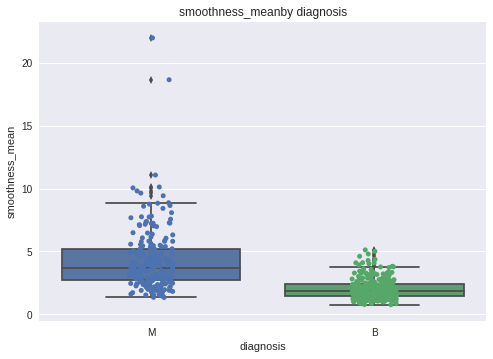

In [5]:
ax = sns.boxplot(x="diagnosis", y=var_1, 
                data=data)
ax = sns.stripplot(x="diagnosis", y=var_1,
                   data=data, jitter=True,
                   edgecolor="gray")
sns.plt.title(var_1 + "by diagnosis", fontsize=12);

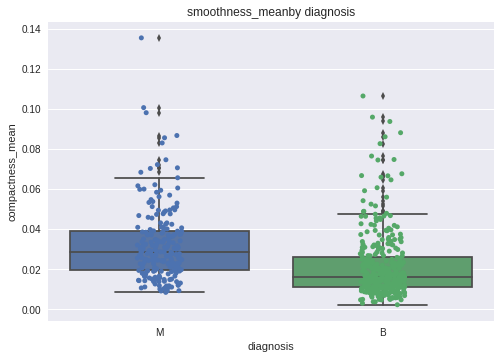

In [6]:
ax = sns.boxplot(x="diagnosis", y=var_2, 
                data=data)
ax = sns.stripplot(x="diagnosis", y=var_2,
                   data=data, jitter=True,
                   edgecolor="gray")
sns.plt.title(var_1 + "by diagnosis", fontsize=12);

The results shows some tendencies. The median in comparison to the mean is more robust and does not depend on the extreeme values, while one outlier might have dramatic influence on mean. 

This is especially visible for the 

### Function to generate bootstrap samples of the data.

In [7]:
#' Function to generate butstrap sample of the data
#' @param data data set
#' @param n size of the sample (shuold be smaller than size of the dataset)
def bootstrap(data, n):
    return data.sample(frac = n/len(data), replace = True)
sample_data = bootstrap(data, 10)
sample_data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.45,26.40,166.10,2027.0,0.14100,0.2113,0.4107,0.22160,0.2060,0.07115
445,9110720,B,11.99,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,...,12.98,30.36,84.48,513.9,0.13110,0.1822,0.1609,0.12020,0.2599,0.08251
243,88411702,B,13.75,23.77,88.54,590.0,0.08043,0.06807,0.04697,0.02344,...,15.01,26.34,98.00,706.0,0.09368,0.1442,0.1359,0.06106,0.2663,0.06321
128,866458,B,15.10,16.39,99.58,674.5,0.11500,0.18070,0.11380,0.08534,...,16.11,18.33,105.90,762.6,0.13860,0.2883,0.1960,0.14230,0.2590,0.07779
224,8813129,B,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,...,15.14,23.60,98.84,708.8,0.12760,0.1311,0.1786,0.09678,0.2506,0.07623


## Exploratory Analysis

- Identify 2-3 variables that are predictive of a malignant tumor.
    - Display the relationship visually and write 1-2 sentences explaining the relationship.

In this section we are going to walk you through the exploratory analysis of the dataset. This is often the most challanging and timeconsumig part of the analysis. There are many ways to assess the importance of the variables in the exploratory analysis For the classification that we are going to perform, one of the most popular and intuitive would be visual representation of the variables on the boxplots. For the modelling (especially logistic regression) it is better to use uncorrelated variables, thats why we also shows correlation plot between different predictors. 

From our previous task we can expect that mean smoothness as well as mean compactness should be quite good predictors.


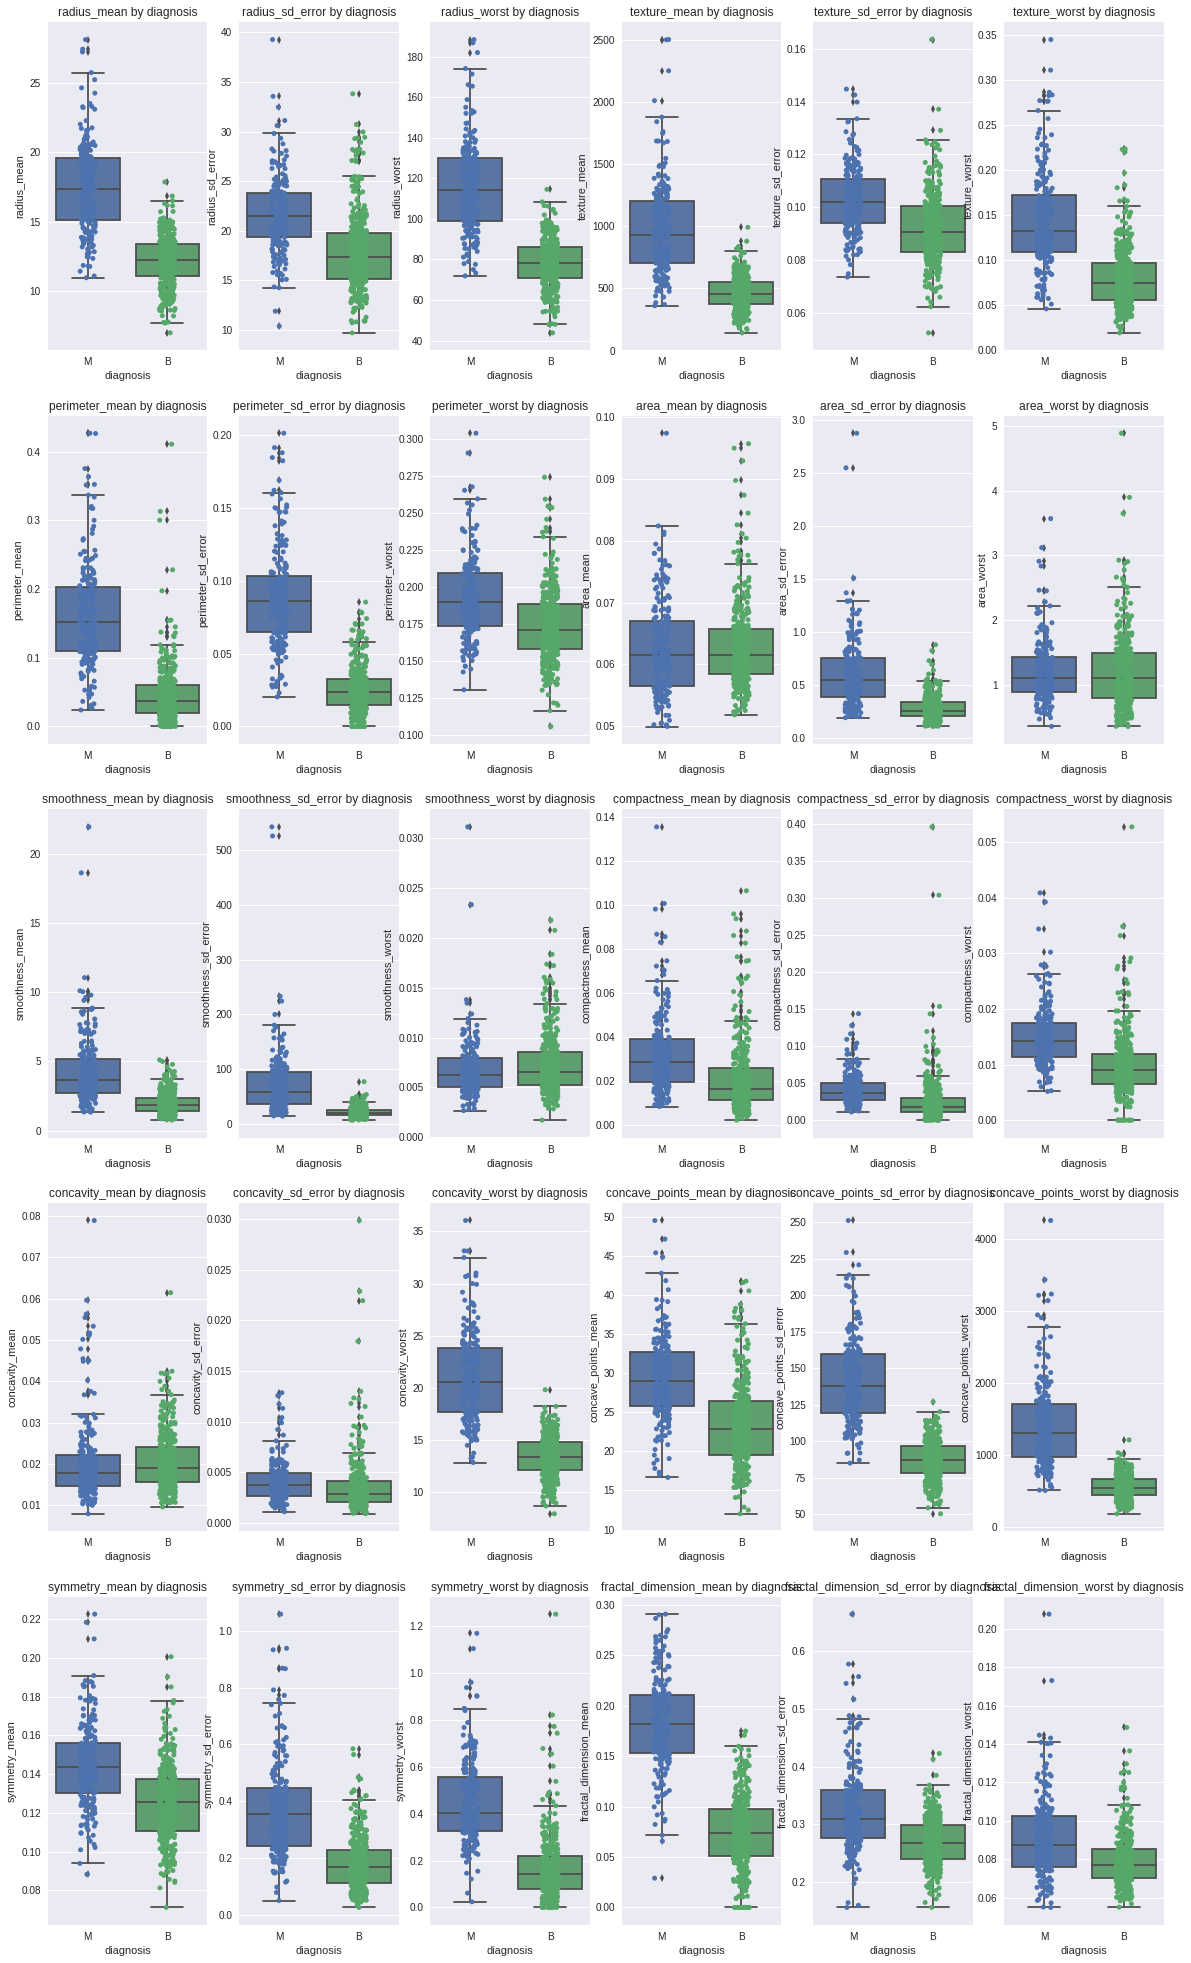

In [8]:
fig = pyplot.figure(figsize=(20,35)) 
j = 1
for i in names[2:]:
    var_1 = i
    ax = fig.add_subplot(5,6,j)
    ax = sns.boxplot(x="diagnosis", y=i, 
                data=data)
    ax = sns.stripplot(x="diagnosis", y=i,
                   data=data, jitter=True,
                   edgecolor="gray")
    sns.plt.title(var_1 + " by diagnosis", fontsize=12);
    j += 1

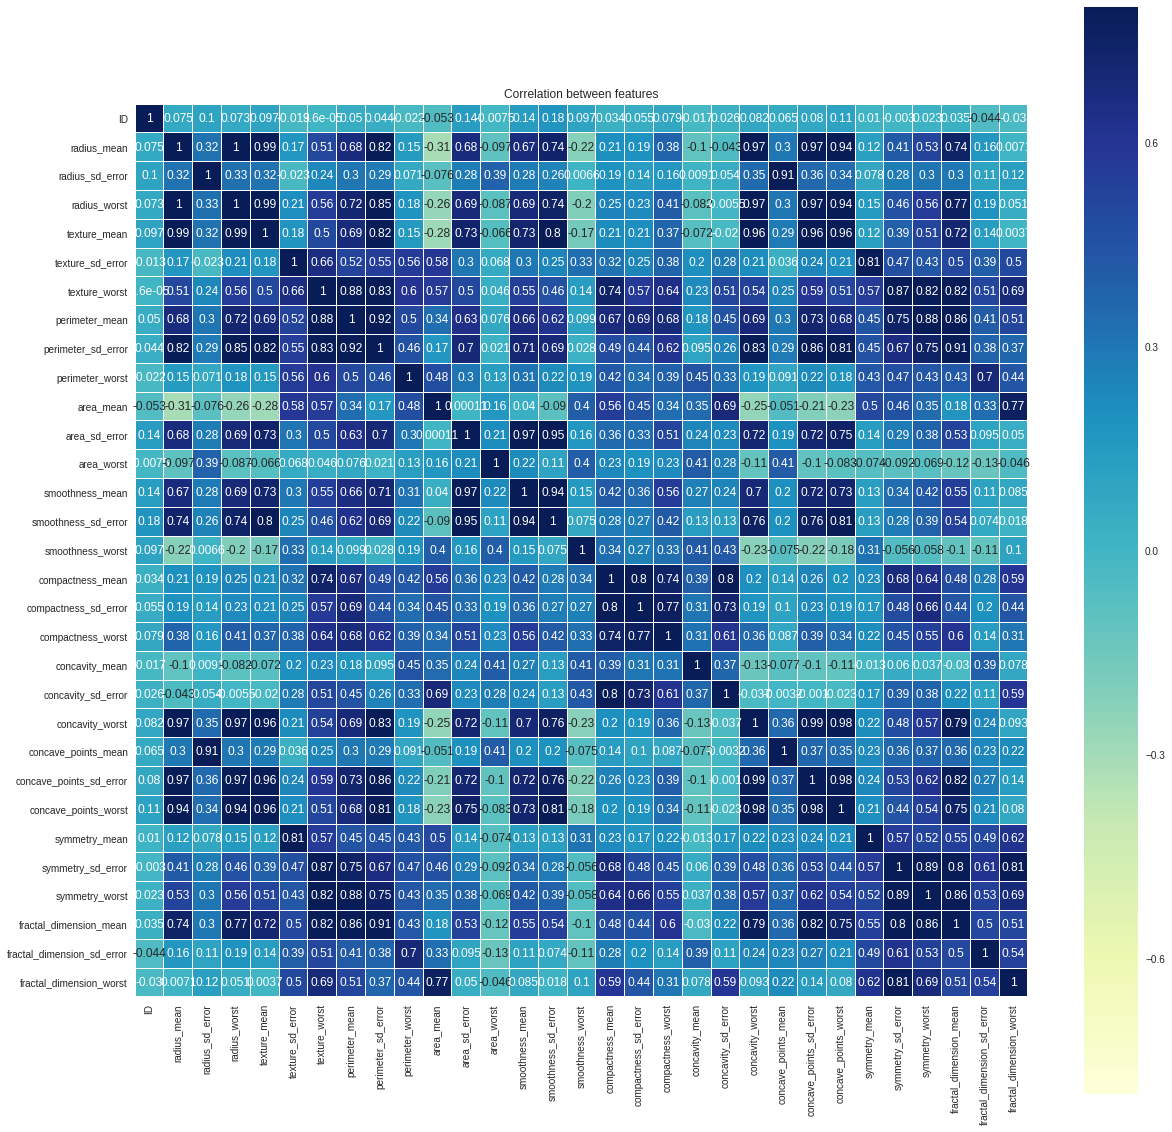

In [9]:
corr=data.corr()
plt.figure(figsize=(20, 20))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

It seems like most os the variables presents well predictve capabilities for this classification task. What is more correlation between them is quite high (more than 0.4), so better for the modelling use less correlated variables.

## Modeling

- Build a model to predict the malignant tumors.
    - Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
    - Identify how you would control for overfitting in each classification technique.
    - Evaluate the performance of each model.
    - In each model, identify the most important predictive variables and explain how you identified them.

### Loading libraries and data preparation

In [10]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

There are many techniques to prevent overfitting/underfitting. In this approach I will use simple crossvalidation. I will split the data into training and testing set. Model will be fitted on the training data and evaluated on the testing. After training process we will check the results (accuracy or f1 meassure) for simmilarity on testing and training sets. 

In [11]:
predictors = names[2:]
X_train, X_test, Y_train, Y_test = train_test_split(data[predictors], 
                                                    data['diagnosis'] == 'M', 
                                                    test_size=0.33, 
                                                    random_state=42)

## Logistic Regression

In [12]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)
Y_test_pred_logreg = logreg.predict(X_test)
Y_train_pred_logreg = logreg.predict(X_train)

print("Accuracy on the treining data is:" + str(logreg.score(X_train, Y_train)))
print("Accuracy on the testing data is:" + str(logreg.score(X_test, Y_test)))

Accuracy on the treining data is:0.958005249344
Accuracy on the testing data is:0.957446808511


The results for the accuracy are pretty simmilar for the training and testing set. We can also use F1 Meassure that is more robust than accuracy. Here we also compare results of F1 on the training and testing set.

In [13]:
print("F1 meassure on the treining data is:" + str(f1_score(Y_train, Y_train_pred_logreg)))
print("F1 meassure on the testing data is:" + str(f1_score(Y_test, Y_test_pred_logreg)))


F1 meassure on the treining data is:0.944055944056
F1 meassure on the testing data is:0.940298507463


For the modelling we will be using all the variables. 

There are plany thchniques of variable selection. You can have a look at some of them in my Machine learnign techniques summary provided in PDF. 

### Importance of coeficients in the Logistic Regression model

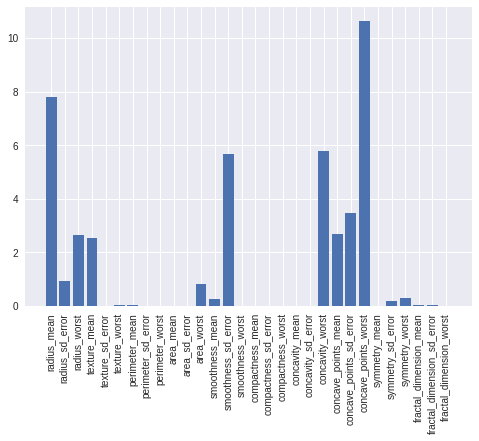

In [14]:
std_coef = np.std(np.asarray(X_train), 0)*logreg.coef_
x = range(len(predictors))
fig = figure()
ax = fig.add_subplot(111)
ax.bar(x, abs(std_coef.transpose()))
ax.set_xticks(x)
ax.set_xticklabels(predictors, rotation=90) ;

We identify the most influencial variables for logistic regression compareing standarised coefficients. We can see that the most influencial variables for Logistic Regression are concave_poits_worst and radius_mean. (We can also use this approach to identify 2 or 3 most influencial variables.) Looking at the plot we can assume that using just 10 out of 30 variables we would have approximately simillar results. 

## Random Forrest

As a seconde model we are using Random Forrest. It is more advanced method than logistic regressiona and as well it also gives often better results. For the classification it is much more flexible and retrive non linear patterns. 

This method uses Decission Trees about wich I was talking in the previous interview. 

In [15]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=70)
random_forest.fit(X_train, Y_train)
Y_test_pred_rf = logreg.predict(X_test)
Y_train_pred_rf = logreg.predict(X_train)

print("Accuracy on the treining data is:" + str(random_forest.score(X_train, Y_train)))
print("Accuracy on the testing data is:" + str(random_forest.score(X_test, Y_test)))

Accuracy on the treining data is:1.0
Accuracy on the testing data is:0.957446808511


Results of the accuracy are pretty close to each other. What is more, we can see that the results are slightly better on both training and testing data

In [16]:
print("F1 meassure on the treining data is:" + str(f1_score(Y_train, Y_train_pred_rf)))
print("F1 meassure on the testing data is:" + str(f1_score(Y_test, Y_test_pred_rf)))

F1 meassure on the treining data is:0.944055944056
F1 meassure on the testing data is:0.940298507463


The F1 meassure results are pretty close on the training and testing dataset. 

### Importance of the variables for Random Forrest

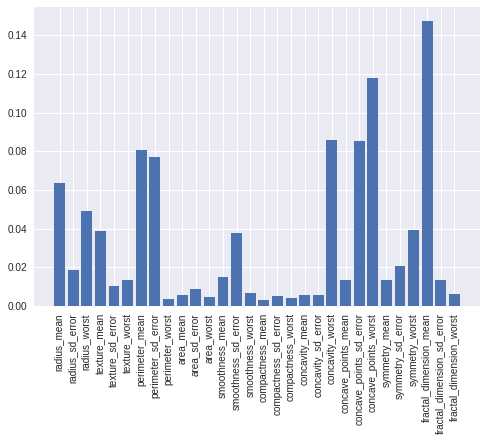

In [17]:
importance = random_forest.feature_importances_
importance = pd.DataFrame(importance, index=predictors, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in random_forest.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]

from pylab import *
fig = figure()
ax = fig.add_subplot(111)
ax.bar(x, y)
ax.set_xticks(x)
ax.set_xticklabels(predictors, rotation=90);

We can see that importance in random forrest is more diverse. Though there is also around 10 variables that have the most influence. Similarly like in Logistic regression in the set of the most influencial variables are: concave_points_worst and concavity_worst 

## Explanation

- To Technical Audiences
    - Explain the limitations of your analysis and identify possible further steps you could take.
- To Non-Technical Audiences
    - Write a short summary of your analysis, explaining how your model works and how it performs.
    - Briefly explain the factors that contributed to malignant vs benign tumor identification.

### Technical audience - limitations and  further steps. 

Main limitation for this exercise was that there was not provided descriptions of the background for the task. 

Further steps and analysis that might be taken. There is a lot of possibilities of extending the analysis. Some of the are:  
- feature engineering 
- variable selection 
- more diverse models
- more measures of the mdoel evaluation. 

For more details you can have a look at the PDF that I provided with the case study for exploring data mining techniques on the German Credit Data. 

## To Non-Technical Audiences

### Write a short summary of your analysis, explaining how your model works and how it performs.

Both models had pretty good and comparable results. With this simple analysis we can predict the malignant vs benign tumor. The models doesn't seem to be overfitted as the results on the testing and trainign data sets are pretty close. Important point is that with using less varibales we can have pretty simmilar results. 

### The factors that contributed to malignant vs benign tumor identification.

As it was commented before we can say that most of the variables might have been used and have some predictive power. 
Four that were identified as important for prepared models were: 

For the Random Forrest: 
- perimeter_worst
- concave_points_sd_error
- concave_points_worst
- fractal_dimension_mean

For the Logistic Regression: 

- radius_worst
- perimeter_sd_error
- concavity_worst
- concave_points_worst


# Part2

## Submission 1

Dear student,

Thank you for your submission, I see great progress with your style, comments, and structure of the analysis. Methodology used for the submission was pretty cleas and well structured into pieces:
- importing libraries
- loadig data
- preparing data for modelling
- preparation of the mdoel
- crossvalidation
- model evaluation

Regarding the concept of crossvalidation it is important to do it on the partition of the dataset.
I partitioned the code into smaller pieces and commented on some points mostly regarding the syntax.

Best Regards, 

Janek Idziak

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

LinearRegression function comes from sklearn.linear_model package. Importing with a command from sklearn import LinearRegression is insufficient.

In [ ]:
# Load data
d = pd.read_csv('../data/train.csv')

This is very good practice to keep data in separate folder: data, what is also good practice is naming variables with meaningful names. I will sugest data instead of just single letter d. Using data it will also integrate with the further part of the code.

In [ ]:
# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

I like how you assign single variable to a names. In the modelling tasks we usually use convention of naming x predictors and y output or class variable. 

In [ ]:
# Setup model
model = LinearRegression()

This is very good step. You assigned Linear Regression model and you gonna use it for crosvalidatiom. If you want to know more about Linear Regression from scikitlearn please have a look at: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [ ]:
# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split


Sometimes during modelling we forget some libraris and load them further in the analysis. Best is to add them at the top of the analysis. What is more, train_test_split function is not used in the analysis. Once you finish analysis, you can reduce not used parts of the code.

In [ ]:
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

cv parameter stands for the crossvalidation. It is technique to estimate the predictio error on the testing set. cv sets number of pieces into which data will be partitioned. The minimum value for the cv parameter is 2.

## Submission 2

Dear student,

Thank you for your submission. The style, comments and the structure are very high quality. Methodology used for the submission was pretty clean and well structured into pieces:

- importing libraries
- loadig data
- preparing data for modelling
- preparation of the mdoel
- crossvalidation
- model evaluation

The concepts of this data analysis task seems to be well understandable to you at this moment. Here you can find some further reading on the different crossvalidation teqniques: https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/ 

Best Regards,
Janek Idziak

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())